<a href="https://colab.research.google.com/github/X3RV/20230223-Test-1-ml/blob/main/X_L03_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv

--2023-02-24 02:44:56--  https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv.1’

diabetes.csv.1      100%[===================>]  23.31K  --.-KB/s    in 0.002s  

2023-02-24 02:44:57 (13.3 MB/s) - ‘diabetes.csv.1’ saved [23873/23873]



['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
[7.0, 100.0, 0.0, 0.0, 0.0, 30.0, 0.484, 32.0]


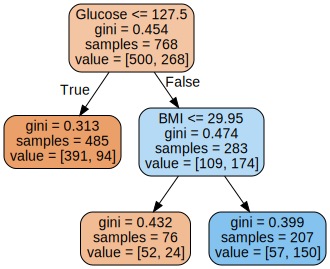

In [12]:
###############################################################################
#   X-L03-1.ipyynb
#   
#   Version 20230223 0.0.1
#   By X3RV
#   02/23/2023 
#
#   Status:  Complete
#
#   Purpose:  Decision tree machine learning.  
#   Diabetes training
#   
#
#   Last Update:  02/23/2023  X3RV
#
################################################################################
# 
from sklearn import tree
import graphviz


with open("diabetes.csv", "r") as f:
  data = f.readlines()

feats = data[0]
feats = feats.replace('\n','')
feats = feats.split(",")

print(feats)

# Last element is an outcome the rest are features
feats = feats[0:(len(feats) - 1)]

# data list
dat = []
# label list
labs = []

for i in range(1, len(data)):
  line = data[i]
  line = line.replace('\n','')
  csvline = line.split(",")
  labs = labs + [int(csvline[len(csvline) - 1])]
  csvline = [float(csvline[i]) for i in range(len(csvline) - 1)]
  dat = dat + [csvline]

print(dat[15])

clf = tree.DecisionTreeClassifier(max_leaf_nodes = 3)
clf = clf.fit(dat, labs)

correct = 0
for i in range(len(dat)):
  if clf.predict([dat[i]]) == labs[i]: 
    correct = correct +1
100.0* correct / len(dat)

# Export the decision tree visualization
dot_data = tree.export_graphviz(clf, feature_names=feats, filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

